## Resumo aula 4 de Machine Learning ##

## 1) KNN

O KNN, que é a sigla de **k nearest neighbors**.

A ideia é bem simples: tomamos uma base de treino classificada (supervisionada). 

A cada observação de teste que queiramos classificar, tomamos **a classe como sendo a classe das $k$ observações que estão mais próximas do elemento a ser classificado**

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

Este algoritmo é muito simples e intuitivo, mas há dois elementos de extrema importância:

> Como medir a **distância** entre dados? Qual é a **métrica** adequada?

O sklearn nos permite escolher diferentes métricas de distância, o que é ótimo, pois assim podemos seguir a habitual abordagem: testar diferentes métricas, e escolher a que der melhores resultados!

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>


- $k=1$ temos alta variância (overfitting).

- $k=N$ temos alto viés (underfitting).

KNN é um método LAZY LEARNER -- Ou seja, **não há uma etapa explícita de treinamento**, conforme vimos antes.

Cada observação de teste é classificada por vez, segundo o passo a passo acima.

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, make_scorer, precision_score, recall_score, accuracy_score, f1_score

In [171]:
bcancer_ds=pd.read_csv('..\datasets\data.csv')
bcancer_ds.info()
# Verificando tipo dos dados, e dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [172]:
# Retirando a coluna com dados nulos
bcancer_ds = bcancer_ds.drop("Unnamed: 32", axis=1)
bcancer_raw = bcancer_ds.copy()

In [173]:
# Separando os dados do target e das features, e realizando a divisão dos dados
y = bcancer_ds['diagnosis']
X = bcancer_ds.drop(columns='diagnosis', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [174]:

# Escalonando os dados
scaler=StandardScaler()
bcancer_scaler = scaler.fit(x_train)
x_train_ss = bcancer_scaler.transform(x_train)
x_test_ss = bcancer_scaler.transform(x_test)


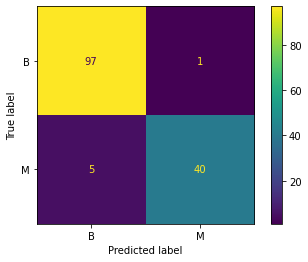

In [175]:
# Configurando o knn, e o KFold
knn = KNeighborsClassifier()
kf5 = KFold(n_splits=5, shuffle=True)

# Realizando o fit, e o predict do modelo
knn.fit(x_train_ss,y_train)
y_predict = knn.predict(x_test_ss)

# Verificando a matriz de confusão
cm = confusion_matrix(y_test, y_predict)
dl=["B","M"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dl)
disp.plot()
scoring = {
    'precision': make_scorer(precision_score, pos_label='M'),
    'recall': make_scorer(recall_score, pos_label='M'),
    'f1': make_scorer(f1_score, pos_label='M'),
    'accuracy': make_scorer(accuracy_score)
}

In [176]:
# Observando os resultados
cv = cross_validate(estimator=knn, X=x_train_ss, y=y_train,cv=kf5 ,scoring=scoring,return_train_score=True)
cv =pd.DataFrame(cv)

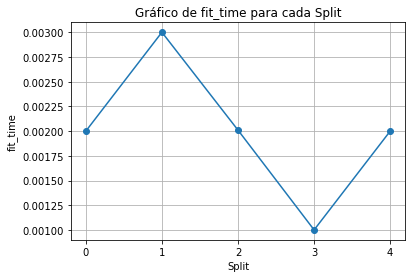

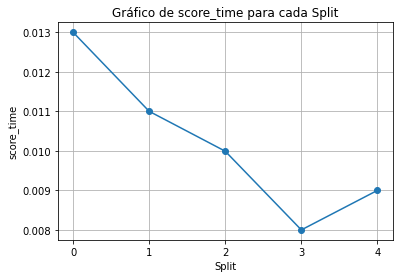

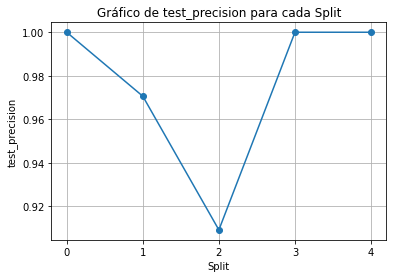

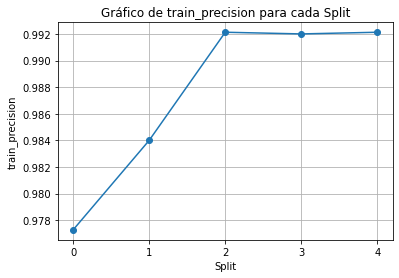

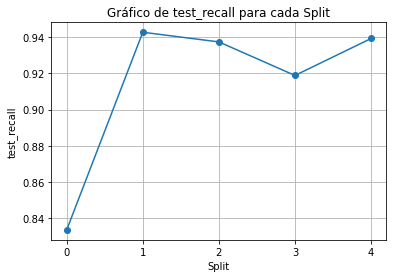

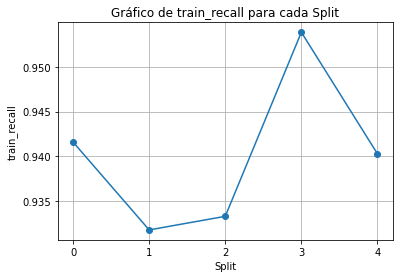

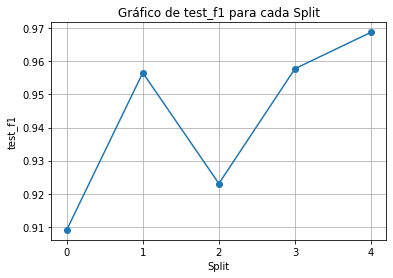

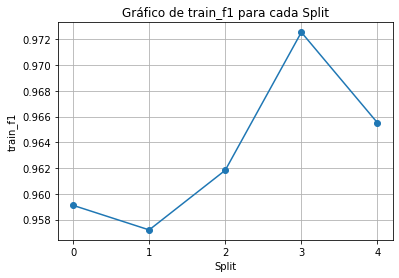

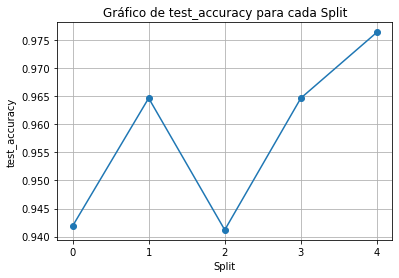

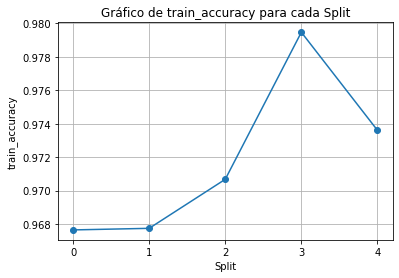

In [177]:
# Analisando graficamente
for metric in cv.columns:
    plt.figure()
    cv[metric].plot(marker='o')
    plt.xlabel('Split')
    plt.ylabel(metric)
    plt.title(f'Gráfico de {metric} para cada Split')
    plt.xticks(range(5))
    plt.grid(True)
    plt.show()

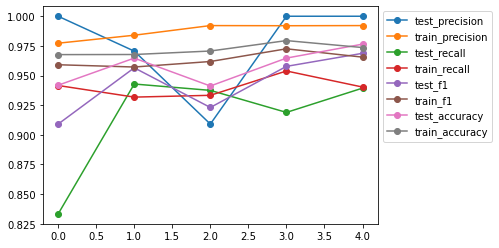

In [178]:
cv = cv.drop(columns = ['fit_time','score_time'])
cv.plot(marker='o')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

## Exercício
Utilize o dataset de Insurance com as categorias criadas abaixo, faça o treinamento do K vizinhos para as classes escolhidas usando os Scalers e compare a performance com diferentes splits

In [179]:
insurance_data = pd.read_csv('..\datasets\insurance.csv')

In [180]:
# Verificando tipo dos dados, e dados nulos
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [181]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [182]:
# Transformando o target em dados categóricos, e features categóricas em numéricas
insurance_data['target'] = np.where(insurance_data['charges'] < 10000, 0, np.where(insurance_data['charges'] < 30000, 1, 2))
insurance_data['flag_sex'] = np.where(insurance_data['sex'] == 'female', 1, 0)
insurance_data['is_smoker'] = np.where(insurance_data['smoker'] == 'yes', 1, 0)

In [183]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   target     1338 non-null   int32  
 8   flag_sex   1338 non-null   int32  
 9   is_smoker  1338 non-null   int32  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 89.0+ KB


In [184]:
# Separando as features numéricas para aplicar o knn, e o target
x = insurance_data.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis = 1)
y = insurance_data["target"]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

print(classification_report(y_test, y_pred))
type(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       143
           1       0.85      0.75      0.80        93
           2       0.93      0.84      0.89        32

    accuracy                           0.87       268
   macro avg       0.88      0.85      0.86       268
weighted avg       0.87      0.87      0.86       268



str

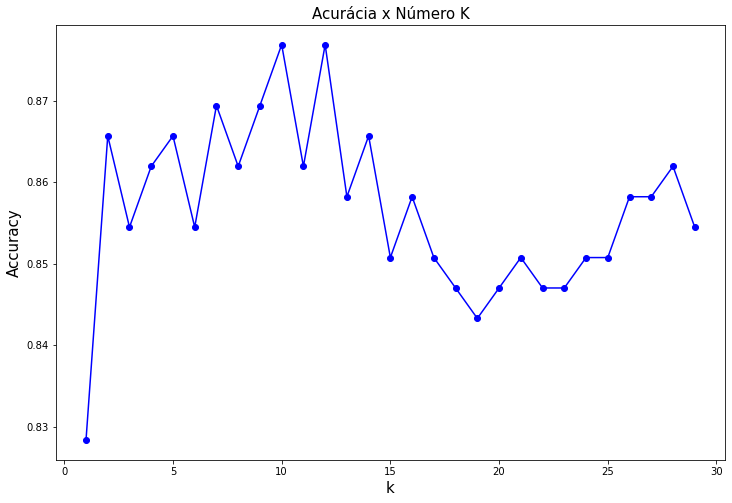

Melhor k: 10


In [186]:
# Avaliando diferentes Ks

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

k = []

accuracy = []

for i in range(1,30,1):
    # Loop para calcular a Acurácia por k vizinhos.
    
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_std, y_train)
    y_predict = model.predict(X_test_std)
    accuracy.append(accuracy_score(y_test, y_predict))
    k.append(i)


plt.figure(figsize=(12,8))
plt.plot(k, accuracy, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracy)+1
print('Melhor k:', best_k)